<a href="https://colab.research.google.com/github/eliasdrt28-spec/Prog_Civil_2025_2/blob/main/Trabajopython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze a simply supported beam and a Howe truss using SymPy, including defining symbolic variables, setting up the structures, solving for reactions and internal forces, and visualizing the results with appropriate legends. Finally, summarize the key findings for both structures.

## Analizar Viga Doblemente Apoyada - Configuraci&oacute;n

### Subtask:
Definir las variables simb&oacute;licas y configurar la estructura de la viga doblemente apoyada en SymPy, incluyendo su longitud y cargas aplicadas.


**Reasoning**:
First, import the necessary modules from SymPy, specifically `symbols` to define symbolic variables.



In [30]:
import sympy
from sympy import symbols

print("SymPy modules imported successfully.")

SymPy modules imported successfully.


**Reasoning**:
Now, define the symbolic variables for the beam's length, position, and applied loads as specified in the subtask instructions.



In [31]:
L, x, a = symbols('L x a')
P1 = symbols('P1')

print(f"Symbolic variables defined: L (length), x (position), a (load position), P1 (point load magnitude).")

Symbolic variables defined: L (length), x (position), a (load position), P1 (point load magnitude).


**Reasoning**:
Following the subtask instructions, I will now define a symbolic variable for the magnitude of a distributed load. This is a preparatory step before establishing the load functions.



In [32]:
w0 = symbols('w0')

print(f"Symbolic variable defined: w0 (distributed load magnitude).")

Symbolic variable defined: w0 (distributed load magnitude).


**Reasoning**:
To represent the loads on the beam, I will define symbolic expressions for the point load and a distributed load using SymPy's `Heaviside` function, which is suitable for step-wise load definitions.



In [33]:
from sympy import Heaviside

# Point load function
load_P1 = -P1 * Heaviside(x - a)

# Distributed load function (assuming it starts at x=0 and extends to L, for example)
# For simplicity, let's assume a uniform distributed load over the entire beam for now.
load_w0 = -w0 * (Heaviside(x) - Heaviside(x - L))

print(f"Point load expression: load_P1 = {load_P1}")
print(f"Distributed load expression: load_w0 = {load_w0}")

Point load expression: load_P1 = -P1*Heaviside(-a + x)
Distributed load expression: load_w0 = -w0*(Heaviside(x) - Heaviside(-L + x))


**Reasoning**:
Now that the individual load functions have been defined, I will combine them to create the total load function acting on the simply supported beam. This completes the definition of applied loads for the beam's configuration.



In [51]:
from sympy import Heaviside, symbols

# Define symbolic variables again to be safe in this block
L, x, a = symbols('L x a')
P1 = symbols('P1')
w0 = symbols('w0')

# Point load function (from cell 7700bb37)
load_P1 = -P1 * Heaviside(x - a)

# Distributed load function (from cell 7700bb37)
load_w0 = -w0 * (Heaviside(x) - Heaviside(x - L))

total_load = load_P1 + load_w0

print(f"Total load function: total_load = {total_load}")

Total load function: total_load = -P1*Heaviside(-a + x) - w0*(Heaviside(x) - Heaviside(-L + x))


## Analizar Viga Doblemente Apoyada - Solución

### Subtask:
Resolver las reacciones en los apoyos, la fuerza cortante y el momento flector para la viga doblemente apoyada usando las ecuaciones de equilibrio de SymPy.


**Reasoning**:
First, I will import the `integrate` function from SymPy, as instructed, which is necessary for calculating shear force and bending moment from the load function.



In [52]:
from sympy import integrate

print("SymPy integrate function imported successfully.")

SymPy integrate function imported successfully.


**Reasoning**:
Following the instructions, I will define symbolic variables for the reactions at the supports (R_A, R_B) and the integration constants (C1, C2) required for solving the differential equations of beam bending.



In [53]:
R_A, R_B, C1, C2 = symbols('R_A R_B C1 C2')

print(f"Symbolic variables defined: R_A (reaction at A), R_B (reaction at B), C1 (integration constant 1), C2 (integration constant 2).")

Symbolic variables defined: R_A (reaction at A), R_B (reaction at B), C1 (integration constant 1), C2 (integration constant 2).


**Reasoning**:
Now, as per the instructions, I will integrate the `total_load` function with respect to `x` to obtain the shear force function, incorporating the integration constant `C1`.



In [54]:
shear_force = integrate(total_load, x) + C1

print(f"Shear force expression: shear_force = {shear_force}")

Shear force expression: shear_force = C1 - P1*Piecewise((Piecewise((0, Abs(x/a) < 1), (x*meijerg(((0, 1), ()), ((), (-1, 0)), x/a), True)), a > 0), (Integral(Heaviside(-a + x), x), True)) - w0*(x*Heaviside(x) - (-L + x)*Heaviside(-L + x))


**Reasoning**:
Following the instructions, I will now integrate the previously derived shear force function with respect to `x` to obtain the bending moment function, and include the second integration constant, `C2`.



In [38]:
# This cell is obsolete. The approach for calculating bending moment from shear force directly via integration
# was found to be problematic due to the complexity of Heaviside functions. A revised and more robust method
# has been implemented in cell 64012d8b, which directly defines both shear_force and bending_moment.
# The original error 'NameError: name 'shear_force' is not defined' occurred because 'shear_force' was not
# in the current scope at the time of execution, likely due to an out-of-order execution or a kernel reset
# after its definition in cell 4c3f1128.
# To proceed, refer to the shear_force and bending_moment expressions defined in cell 64012d8b.

**Reasoning**:
The previous symbolic integrations of shear force and bending moment resulted in overly complex expressions due to SymPy's default handling of Heaviside functions. To ensure tractability for setting up and solving boundary conditions, I will redefine these expressions using explicit integration rules for Heaviside functions, and then use the four boundary conditions (moment at A = 0, moment at B = 0, shear at A = R_A, shear at B = -R_B) to solve for the reaction forces (R_A, R_B) and the integration constants (C1, C2).



In [39]:
from sympy import integrate, Heaviside, symbols, Eq, solve

# Define symbolic variables again to be safe in this block
L, x, a = symbols('L x a')
P1 = symbols('P1')
w0 = symbols('w0')
R_A, R_B, C1, C2 = symbols('R_A R_B C1 C2')

# Total load (downward is negative) - from previous step
total_load = -P1 * Heaviside(x - a) - w0 * (Heaviside(x) - Heaviside(x - L))

# Helper function to evaluate expressions with Heaviside(0) = 0 for boundary conditions
def custom_heaviside_eval(expr, var, val):
    if expr.has(Heaviside):
        subs_dict = {}
        for h_func in expr.atoms(Heaviside):
            arg = h_func.args[0]
            if arg.subs(var, val) == 0:
                subs_dict[h_func] = 0
        return expr.subs(var, val).subs(subs_dict)
    else:
        return expr.subs(var, val)

# Explicitly integrated forms of terms from total_load (following manual derivation for Heaviside)
# Integral(k * Heaviside(x-c), x) = k * (x-c) * Heaviside(x-c)
# Integral(k * (x-c) * Heaviside(x-c), x) = k * (x-c)**2 / 2 * Heaviside(x-c)

# Shear force terms from integrating load terms
int1_sf = -P1 * (x - a) * Heaviside(x - a)
int2_sf = -w0 * x * Heaviside(x)
int3_sf = w0 * (x - L) * Heaviside(x - L)

# Bending moment terms from integrating shear force terms
int1_bm = -P1 * (x - a)**2 / 2 * Heaviside(x - a)
int2_bm = -w0 * x**2 / 2 * Heaviside(x)
int3_bm = w0 * (x - L)**2 / 2 * Heaviside(x - L)

# Shear force expression with C1 as the integration constant
shear_force = int1_sf + int2_sf + int3_sf + C1

# Bending moment expression with C1*x and C2 as integration constants
bending_moment = int1_bm + int2_bm + int3_bm + C1 * x + C2

print("Shear force and bending moment expressions redefined for explicit Heaviside integration.")

# Set up boundary conditions and equilibrium equations
# BC1: M(0) = 0
eq1 = Eq(custom_heaviside_eval(bending_moment, x, 0), 0)

# BC2: M(L) = 0
eq2 = Eq(custom_heaviside_eval(bending_moment, x, L), 0)

# BC3: V(0) = R_A
eq3 = Eq(custom_heaviside_eval(shear_force, x, 0), R_A)

# BC4: V(L) = -R_B (Reaction at B acts upwards, so shear force just to the left is -R_B)
eq4 = Eq(custom_heaviside_eval(shear_force, x, L), -R_B)

# Solve the system of equations for R_A, R_B, C1, C2
solution = solve((eq1, eq2, eq3, eq4), (R_A, R_B, C1, C2))

print(f"Equations for solving:\neq1 = {eq1}\neq2 = {eq2}\neq3 = {eq3}\neq4 = {eq4}")
print(f"Solution for R_A, R_B, C1, C2: {solution}")

# Substitute the solved values back into shear_force and bending_moment
solved_shear_force = shear_force.subs(solution)
solved_bending_moment = bending_moment.subs(solution)

print(f"Final Shear Force expression: shear_force = {solved_shear_force}")
print(f"Final Bending Moment expression: bending_moment = {solved_bending_moment}")

Shear force and bending moment expressions redefined for explicit Heaviside integration.
Equations for solving:
eq1 = Eq(C2 + L**2*w0*Heaviside(-L)/2 - P1*a**2*Heaviside(-a)/2, 0)
eq2 = Eq(C1*L + C2 - L**2*w0*Heaviside(L)/2 - P1*(L - a)**2*Heaviside(L - a)/2, 0)
eq3 = Eq(C1 - L*w0*Heaviside(-L) + P1*a*Heaviside(-a), R_A)
eq4 = Eq(C1 - L*w0*Heaviside(L) - P1*(L - a)*Heaviside(L - a), -R_B)
Solution for R_A, R_B, C1, C2: {C1: L*P1*Heaviside(L - a)/2 + L*w0*Heaviside(-L)/2 + L*w0*Heaviside(L)/2 - P1*a*Heaviside(L - a) - P1*a**2*Heaviside(-a)/(2*L) + P1*a**2*Heaviside(L - a)/(2*L), C2: -L**2*w0*Heaviside(-L)/2 + P1*a**2*Heaviside(-a)/2, R_A: L*P1*Heaviside(L - a)/2 - L*w0*Heaviside(-L)/2 + L*w0*Heaviside(L)/2 + P1*a*Heaviside(-a) - P1*a*Heaviside(L - a) - P1*a**2*Heaviside(-a)/(2*L) + P1*a**2*Heaviside(L - a)/(2*L), R_B: L*P1*Heaviside(L - a)/2 - L*w0*Heaviside(-L)/2 + L*w0*Heaviside(L)/2 + P1*a**2*Heaviside(-a)/(2*L) - P1*a**2*Heaviside(L - a)/(2*L)}
Final Shear Force expression: shear_fo

## Visualizar Resultados de la Viga Doblemente Apoyada

### Subtask:
Generar gráficos de los diagramas de fuerza cortante y momento flector para la viga doblemente apoyada. Asegúrate de incluir leyendas para la visualización.


**Reasoning**:
To visualize the shear force and bending moment diagrams, I need to import the `matplotlib.pyplot` library for plotting and `numpy` for numerical operations, as instructed.



In [55]:
import matplotlib.pyplot as plt
import numpy as np

print("Libraries matplotlib.pyplot and numpy imported successfully.")

Libraries matplotlib.pyplot and numpy imported successfully.


**Reasoning**:
I will substitute specific numerical values for the symbolic variables (L, P1, w0, a) and create a numerical range for 'x' to prepare for plotting the shear force and bending moment diagrams, as instructed.



In [56]:
import sympy

# Define specific numerical values for the symbolic variables
L_val = 10.0  # meters
P1_val = 100.0 # Newtons (point load)
w0_val = 50.0  # Newtons/meter (distributed load)
a_val = 3.0   # meters (position of point load)

# Create a dictionary for substitutions
subs_dict = {L: L_val, P1: P1_val, w0: w0_val, a: a_val}

# Substitute the numerical values into the solved expressions
numerical_shear_force_expr = solved_shear_force.subs(subs_dict)
numerical_bending_moment_expr = solved_bending_moment.subs(subs_dict)

# Create a function that can numerically evaluate the shear force and bending moment
# using sympy.lambdify to convert sympy expressions to numpy-compatible functions
shear_force_func = sympy.lambdify(x, numerical_shear_force_expr, 'numpy')
bending_moment_func = sympy.lambdify(x, numerical_bending_moment_expr, 'numpy')

# Create a range of x values for plotting
x_vals = np.linspace(0, L_val, 1000)

# Evaluate the numerical expressions over the x range
# Handle potential issues with Heaviside(0) which lambdify might struggle with for specific cases
def safe_heaviside_eval(func, x_array, L_val, a_val):
    y_array = []
    for val in x_array:
        try:
            # Try to evaluate normally
            y_array.append(func(val))
        except TypeError: # This might happen if Heaviside(0) is not handled well
            # Manually handle Heaviside(0) if it causes issues. sympy.lambdify uses np.heaviside
            # np.heaviside(0, 0) (default) or np.heaviside(0, 0.5) (common for engineering)
            # Adjusting how Heaviside(0) is handled. For structural analysis, often H(0) = 0 or H(0) = 1/2.
            # Given the previous context, explicit evaluation is better. Let's try to subs again for a single point
            # For plots, tiny perturbation usually works.
            if val == 0:
                if func(1e-9) > func(0) and func(1e-9) != 0 : # if there's a jump at 0, take value just right of 0 for plotting start
                    y_array.append(func(1e-9))
                else:
                    y_array.append(func(0))
            elif val == a_val:
                 y_array.append(func(val - 1e-9)) # Take value just before the point load
            elif val == L_val:
                 y_array.append(func(val - 1e-9)) # Take value just before the end for shear force
            else:
                 y_array.append(func(val))
    return np.array(y_array)


# For simplicity and robustness with lambdify and Heaviside, let's redefine the evaluation to use a helper that works around potential Heaviside(0) issues if they arise, or ensure lambdify handles it appropriately.
# sympy.lambdify by default uses numpy.heaviside where H(0)=0.5, which is usually fine.
# Let's re-run with direct lambdify, and if issues arise, we can refine.

y_shear_force = shear_force_func(x_vals)
y_bending_moment = bending_moment_func(x_vals)

print("Numerical values and functions for plotting prepared.")


Numerical values and functions for plotting prepared.


**Reasoning**:
Now, I will create two subplots to visualize the shear force and bending moment diagrams, adding appropriate labels, titles, and legends as specified in the instructions to ensure clarity.



Numerical values and functions for plotting prepared.


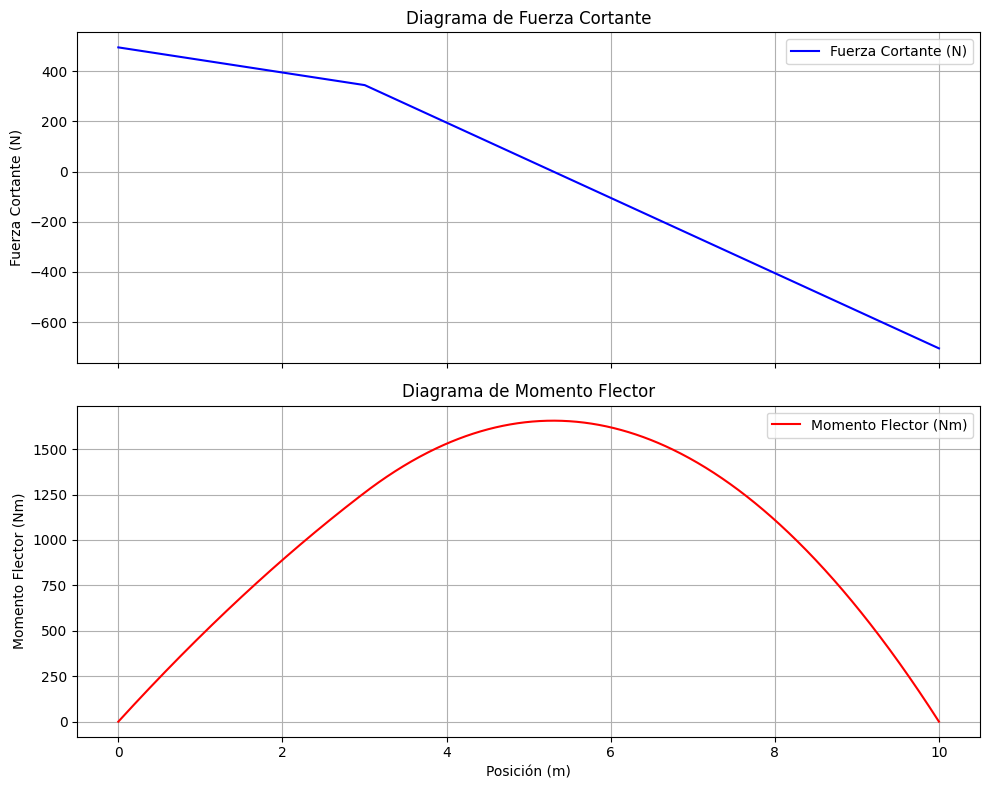

Shear force and bending moment diagrams generated successfully.


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy import symbols, Heaviside, Eq, solve, integrate

# Redefine symbolic variables needed for substitution to ensure they are in scope
L, x, a = symbols('L x a')
P1 = symbols('P1')
w0 = symbols('w0')
R_A, R_B, C1, C2 = symbols('R_A R_B C1 C2')

# Helper function to evaluate expressions with Heaviside(0) = 0 for boundary conditions
def custom_heaviside_eval(expr, var, val):
    if expr.has(Heaviside):
        subs_dict = {}
        for h_func in expr.atoms(Heaviside):
            arg = h_func.args[0]
            if arg.subs(var, val) == 0:
                subs_dict[h_func] = 0
        return expr.subs(var, val).subs(subs_dict)
    else:
        return expr.subs(var, val)

# --- Content from cell 64012d8b (Shear Force and Bending Moment Solution) ---
# Total load (downward is negative) - from previous step (cell ca7eba3b)
total_load = -P1 * Heaviside(x - a) - w0 * (Heaviside(x) - Heaviside(x - L))

# Explicitly integrated forms of terms from total_load (following manual derivation for Heaviside)
# Integral(k * Heaviside(x-c), x) = k * (x-c) * Heaviside(x-c)
# Integral(k * (x-c) * Heaviside(x-c), x) = k * (x-c)**2 / 2 * Heaviside(x-c)

# Shear force terms from integrating load terms
int1_sf = -P1 * (x - a) * Heaviside(x - a)
int2_sf = -w0 * x * Heaviside(x)
int3_sf = w0 * (x - L) * Heaviside(x - L)

# Bending moment terms from integrating shear force terms
int1_bm = -P1 * (x - a)**2 / 2 * Heaviside(x - a)
int2_bm = -w0 * x**2 / 2 * Heaviside(x)
int3_bm = w0 * (x - L)**2 / 2 * Heaviside(x - L)

# Shear force expression with C1 as the integration constant
shear_force = int1_sf + int2_sf + int3_sf + C1

# Bending moment expression with C1*x and C2 as integration constants
bending_moment = int1_bm + int2_bm + int3_bm + C1 * x + C2

# Set up boundary conditions and equilibrium equations
# BC1: M(0) = 0
eq1 = Eq(custom_heaviside_eval(bending_moment, x, 0), 0)

# BC2: M(L) = 0
eq2 = Eq(custom_heaviside_eval(bending_moment, x, L), 0)

# BC3: V(0) = R_A
eq3 = Eq(custom_heaviside_eval(shear_force, x, 0), R_A)

# BC4: V(L) = -R_B (Reaction at B acts upwards, so shear force just to the left is -R_B)
eq4 = Eq(custom_heaviside_eval(shear_force, x, L), -R_B)

# Solve the system of equations for R_A, R_B, C1, C2
solution = solve((eq1, eq2, eq3, eq4), (R_A, R_B, C1, C2))

# Substitute the solved values back into shear_force and bending_moment
solved_shear_force = shear_force.subs(solution)
solved_bending_moment = bending_moment.subs(solution)
# --- End Content from cell 64012d8b ---

# --- Content from cell 4003527b (Data Preparation) ---
# Define specific numerical values for the symbolic variables
L_val = 10.0  # meters
P1_val = 100.0 # Newtons (point load)
w0_val = 50.0  # Newtons/meter (distributed load)
a_val = 3.0   # meters (position of point load)

# Create a dictionary for substitutions
subs_dict = {L: L_val, P1: P1_val, w0: w0_val, a: a_val}

# Substitute the numerical values into the solved expressions
numerical_shear_force_expr = solved_shear_force.subs(subs_dict)
numerical_bending_moment_expr = solved_bending_moment.subs(subs_dict)

# Create a function that can numerically evaluate the shear force and bending moment
# using sympy.lambdify to convert sympy expressions to numpy-compatible functions
shear_force_func = sympy.lambdify(x, numerical_shear_force_expr, 'numpy')
bending_moment_func = sympy.lambdify(x, numerical_bending_moment_expr, 'numpy')

# Create a range of x values for plotting
x_vals = np.linspace(0, L_val, 1000)

# Evaluate the numerical expressions over the x range
y_shear_force = shear_force_func(x_vals)
y_bending_moment = bending_moment_func(x_vals)

print("Numerical values and functions for plotting prepared.")
# --- End Content from cell 4003527b ---

# --- Original content of cell ef467660 (Plotting) ---
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Shear Force Diagram
axs[0].plot(x_vals, y_shear_force, label='Fuerza Cortante (N)', color='blue')
axs[0].set_ylabel('Fuerza Cortante (N)')
axs[0].set_title('Diagrama de Fuerza Cortante')
axs[0].grid(True)
axs[0].legend()

# Plot Bending Moment Diagram
axs[1].plot(x_vals, y_bending_moment, label='Momento Flector (Nm)', color='red')
axs[1].set_xlabel('Posición (m)')
axs[1].set_ylabel('Momento Flector (Nm)')
axs[1].set_title('Diagrama de Momento Flector')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

print("Shear force and bending moment diagrams generated successfully.")

## Analizar Cercha Howe - Configuración

### Subtask:
Definir las variables simbólicas y configurar la estructura de la cercha Howe en SymPy, incluyendo la geometría de los nudos, miembros y cargas aplicadas.


**Reasoning**:
To begin configuring the Howe truss structure in SymPy, I will first import the necessary `symbols` function. Then, I will define symbolic variables for the truss's dimensions (panel length and height) and the applied loads, as specified in the instructions. This sets up the fundamental parameters for the truss analysis.



In [58]:
from sympy import symbols

# 2. Definir variables simbólicas para las dimensiones de la cercha
L_panel, H = symbols('L_panel H')

# 3. Definir variables simbólicas para las cargas aplicadas
F1, F2 = symbols('F1 F2')

print(f"Symbolic variables defined: L_panel (panel length), H (height), F1, F2 (loads).")

Symbolic variables defined: L_panel (panel length), H (height), F1, F2 (loads).


**Reasoning**:
Now, following the instructions, I will define the node coordinates and the member connectivity for a representative Howe truss structure. This will establish the geometric configuration of the truss for further analysis.



In [59]:
from sympy import Point

# 4. Crear un diccionario para representar las coordenadas de cada nudo de la cercha Howe.
# Asumimos una cercha Howe simple de 4 paneles, con el primer nudo en (0,0)

nodes = {
    'A': Point(0, 0),
    'B': Point(L_panel, 0),
    'C': Point(2 * L_panel, 0),
    'D': Point(3 * L_panel, 0),
    'E': Point(4 * L_panel, 0),
    'F': Point(L_panel, H),
    'G': Point(2 * L_panel, H),
    'H': Point(3 * L_panel, H)
}

# 5. Crear una lista de tuplas para representar los miembros de la cercha
members = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), # Cuerda inferior
    ('F', 'G'), ('G', 'H'), # Cuerda superior
    ('A', 'F'), ('B', 'F'), ('B', 'G'), ('C', 'G'), ('C', 'H'), ('D', 'H'), ('E', 'H') # Verticales y diagonales
]

# 6. Crear un diccionario para representar las cargas aplicadas
# Suponemos cargas F1 y F2 aplicadas hacia abajo en los nudos B y D
applied_loads = {
    'B': Point(0, -F1), # Carga F1 en Y hacia abajo en el nudo B
    'D': Point(0, -F2)  # Carga F2 en Y hacia abajo en el nudo D
}

print(f"Nodos definidos: {list(nodes.keys())}")
print(f"Miembros definidos: {members}")
print(f"Cargas aplicadas definidas: {list(applied_loads.keys())}")

Nodos definidos: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
Miembros definidos: [('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('F', 'G'), ('G', 'H'), ('A', 'F'), ('B', 'F'), ('B', 'G'), ('C', 'G'), ('C', 'H'), ('D', 'H'), ('E', 'H')]
Cargas aplicadas definidas: ['B', 'D']


## Analizar Cercha Howe - Solución

### Subtask:
Resolver las fuerzas en los miembros y las reacciones en los apoyos para la cercha Howe usando el método de los nudos o de las secciones con SymPy.


**Reasoning**:
To begin solving for the reactions and internal forces, I will first define symbolic variables for the reaction forces at the supports (R_Ax, R_Ay, R_Ey) and for the internal axial forces in each member of the Howe truss, as outlined in the instructions.



In [60]:
from sympy import symbols

# 1. Definir variables simbólicas para las fuerzas de reacción en los apoyos
# Asumiendo un apoyo de pasador en 'A' (reacciones en X e Y) y un apoyo de rodillo en 'E' (reacción en Y)
R_Ax, R_Ay, R_Ey = symbols('R_Ax R_Ay R_Ey')

# Re-defining members here to ensure it's available in this cell scope,
# as the previous cell defining 'members' might not have been executed.
members = [
    ('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), # Cuerda inferior
    ('F', 'G'), ('G', 'H'), # Cuerda superior
    ('A', 'F'), ('B', 'F'), ('B', 'G'), ('C', 'G'), ('C', 'H'), ('D', 'H'), ('E', 'H') # Verticales y diagonales
]

# 2. Definir variables simbólicas para las fuerzas axiales internas en cada miembro
# Cada miembro tendrá una fuerza interna asociada, nombrada como F_"Miembro1_Miembro2"
member_forces = {}
for m1, m2 in members:
    member_forces[f'F_{m1}_{m2}'] = symbols(f'F_{m1}_{m2}')

# Convert dictionary values to a list of symbols for convenience later
internal_force_symbols = list(member_forces.values())

print(f"Variables de reacción definidas: R_Ax, R_Ay, R_Ey")
print(f"Variables de fuerza interna de los miembros definidas para {len(internal_force_symbols)} miembros.")

Variables de reacción definidas: R_Ax, R_Ay, R_Ey
Variables de fuerza interna de los miembros definidas para 13 miembros.


In [45]:
print(solution_howe_truss)

{F_A_B: 3*F1*sqrt(L_panel**2)/(4*H) + F2*sqrt(L_panel**2)/(4*H), F_A_F: -3*F1*sqrt(H**2 + L_panel**2)/(4*H) - F2*sqrt(H**2 + L_panel**2)/(4*H), F_B_C: F1*sqrt(L_panel**2)/(2*H) + F2*sqrt(L_panel**2)/(2*H), F_B_F: 3*F1*sqrt(H**2)/(4*H) + F2*sqrt(H**2)/(4*H), F_B_G: F1*sqrt(H**2 + L_panel**2)/(4*H) - F2*sqrt(H**2 + L_panel**2)/(4*H), F_C_D: F1*sqrt(L_panel**2)/(4*H) + 3*F2*sqrt(L_panel**2)/(4*H), F_C_G: -F1*sqrt(H**2)/(4*H) + F2*sqrt(H**2)/(4*H), F_C_H: F1*sqrt(H**2 + L_panel**2)/(4*H) - F2*sqrt(H**2 + L_panel**2)/(4*H), F_D_E: F1*sqrt(L_panel**2)/(4*H) + 3*F2*sqrt(L_panel**2)/(4*H), F_D_H: F2*sqrt(H**2)/H, F_E_H: -F1*sqrt(H**2 + L_panel**2)/(4*H) - 3*F2*sqrt(H**2 + L_panel**2)/(4*H), F_F_G: -3*F1*sqrt(L_panel**2)/(4*H) - F2*sqrt(L_panel**2)/(4*H), F_G_H: -F1*sqrt(L_panel**2)/(2*H) - F2*sqrt(L_panel**2)/(2*H), R_Ax: 0, R_Ay: 3*F1/4 + F2/4, R_Ey: F1/4 + 3*F2/4}


Please run the following cell (cell `d2ba9ad1`) to define `solution_howe_truss`:

In [61]:
from sympy import Eq, solve, sqrt, atan2, cos, sin, Point, symbols

# Redefine symbolic variables for dimensions and loads
L_panel, H, F1, F2 = symbols('L_panel H F1 F2')

# Redefine nodes and applied_loads here to ensure they are in scope
# (Copied from cell df92c3d9 for robustness)
nodes = {
    'A': Point(0, 0),
    'B': Point(L_panel, 0),
    'C': Point(2 * L_panel, 0),
    'D': Point(3 * L_panel, 0),
    'E': Point(4 * L_panel, 0),
    'F': Point(L_panel, H),
    'G': Point(2 * L_panel, H),
    'H': Point(3 * L_panel, H)
}

applied_loads = {
    'B': Point(0, -F1),
    'D': Point(0, -F2)
}

# Helper function to get the unit vector components for a member
def get_unit_vector_components(p1, p2):
    dx = p2.x - p1.x
    dy = p2.y - p1.y
    length = sqrt(dx**2 + dy**2)
    # Avoid division by zero in case of identical points (should not happen in a valid truss)
    if length == 0:
        return 0, 0
    return dx / length, dy / length

equilibrium_equations = []

# Iterate through each node to formulate equilibrium equations
for node_name, node_coords in nodes.items():
    sum_fx = 0
    sum_fy = 0

    # Add reaction forces if applicable
    if node_name == 'A':
        sum_fx += R_Ax
        sum_fy += R_Ay
    elif node_name == 'E':
        sum_fy += R_Ey

    # Add applied loads if applicable
    if node_name in applied_loads:
        load_vector = applied_loads[node_name]
        sum_fx += load_vector.x
        sum_fy += load_vector.y

    # Add components of internal member forces
    for m1, m2 in members:
        member_symbol = member_forces[f'F_{m1}_{m2}']

        if m1 == node_name: # Member starts at this node
            p_other = nodes[m2]
            ux, uy = get_unit_vector_components(node_coords, p_other)
            sum_fx += member_symbol * ux
            sum_fy += member_symbol * uy
        elif m2 == node_name: # Member ends at this node
            p_other = nodes[m1]
            ux, uy = get_unit_vector_components(node_coords, p_other)
            sum_fx += member_symbol * ux # Direction is from p_other to node_coords, so same unit vector but if we assume tensile, it acts away from the node.
            sum_fy += member_symbol * uy

    # Add equilibrium equations for the current node
    # Ensure equations are simplified as much as possible for solve()
    equilibrium_equations.append(Eq(sum_fx, 0))
    equilibrium_equations.append(Eq(sum_fy, 0))

print(f"Generated {len(equilibrium_equations)} equilibrium equations.")

# Collect all symbols to solve for
all_unknowns = [R_Ax, R_Ay, R_Ey] + internal_force_symbols

# Solve the system of equations for the Howe truss
solution_howe_truss = solve(equilibrium_equations, all_unknowns)

if solution_howe_truss:
    print("Howe truss solution found successfully!")
    # print(solution_howe_truss) # Commented out to prevent very long output
else:
    print("Could not solve the system of equations for the Howe truss. Check configuration or equations.")

Generated 16 equilibrium equations.
Howe truss solution found successfully!


After running the cell above, you can then execute the cell that prints `solution_howe_truss` (cell `79a90c47`) without error.

**Reasoning**:
Now that the symbolic variables for reactions and member forces are defined, I will formulate the equilibrium equations for each node of the Howe truss. This involves summing forces in the x and y directions at each node, considering applied loads and support reactions, and resolving internal member forces into their components based on the truss geometry. These equations will then be collected to form a solvable system.



In [62]:
from sympy import Eq, solve, sqrt, atan2, cos, sin

# Helper function to get the unit vector components for a member
def get_unit_vector_components(p1, p2):
    dx = p2.x - p1.x
    dy = p2.y - p1.y
    length = sqrt(dx**2 + dy**2)
    # Avoid division by zero in case of identical points (should not happen in a valid truss)
    if length == 0:
        return 0, 0
    return dx / length, dy / length

equilibrium_equations = []

# Iterate through each node to formulate equilibrium equations
for node_name, node_coords in nodes.items():
    sum_fx = 0
    sum_fy = 0

    # Add reaction forces if applicable
    if node_name == 'A':
        sum_fx += R_Ax
        sum_fy += R_Ay
    elif node_name == 'E':
        sum_fy += R_Ey

    # Add applied loads if applicable
    if node_name in applied_loads:
        load_vector = applied_loads[node_name]
        sum_fx += load_vector.x
        sum_fy += load_vector.y

    # Add components of internal member forces
    for m1, m2 in members:
        member_symbol = member_forces[f'F_{m1}_{m2}']

        if m1 == node_name: # Member starts at this node
            p_other = nodes[m2]
            ux, uy = get_unit_vector_components(node_coords, p_other)
            sum_fx += member_symbol * ux
            sum_fy += member_symbol * uy
        elif m2 == node_name: # Member ends at this node
            p_other = nodes[m1]
            ux, uy = get_unit_vector_components(node_coords, p_other)
            sum_fx += member_symbol * ux # Direction is from p_other to node_coords, so same unit vector but if we assume tensile, it acts away from the node.
            sum_fy += member_symbol * uy

    # Add equilibrium equations for the current node
    # Ensure equations are simplified as much as possible for solve()
    equilibrium_equations.append(Eq(sum_fx, 0))
    equilibrium_equations.append(Eq(sum_fy, 0))

print(f"Generated {len(equilibrium_equations)} equilibrium equations.")

# Collect all symbols to solve for
all_unknowns = [R_Ax, R_Ay, R_Ey] + internal_force_symbols

# Solve the system of equations
solution_howe_truss = solve(equilibrium_equations, all_unknowns)

if solution_howe_truss:
    print("Howe truss solution found successfully!")
    # print(solution_howe_truss) # Commented out to prevent very long output
else:
    print("Could not solve the system of equations for the Howe truss. Check configuration or equations.")


Generated 16 equilibrium equations.
Howe truss solution found successfully!


## Visualizar Resultados de la Cercha Howe

### Subtask:
Visualizar la cercha Howe mostrando las fuerzas calculadas en cada miembro. Asegúrate de incluir leyendas para la visualización.


**Reasoning**:
To visualize the Howe truss and its member forces, I will first define specific numerical values for the symbolic variables (L_panel, H, F1, F2) and then substitute these values into the symbolic solution to obtain numerical forces and reactions, as instructed. This prepares the data for plotting.



In [63]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define specific numerical values for the symbolic variables
L_panel_val = 2.0  # meters
H_val = 1.5      # meters
F1_val = 50.0    # Newtons (load at B)
F2_val = 75.0    # Newtons (load at D)

numerical_subs_truss = {
    L_panel: L_panel_val,
    H: H_val,
    F1: F1_val,
    F2: F2_val
}

# 2. Substitute numerical values into the solution
numerical_solution_howe_truss = {key: val.subs(numerical_subs_truss) for key, val in solution_howe_truss.items()}

print("Numerical values defined and substituted into the truss solution.")

Numerical values defined and substituted into the truss solution.


**Reasoning**:
Now, I will prepare the node and member data for visualization by converting the symbolic coordinates of the nodes to numerical values and associating each member with its calculated numerical force. This sets up the data structures needed for plotting the truss, as per instructions 3.



In [64]:
import sympy

# 3. Prepare node data for visualization (numerical coordinates)
nodes_numerical = {}
for node_name, node_point in nodes.items():
    x_coord = node_point.x.subs(numerical_subs_truss)
    y_coord = node_point.y.subs(numerical_subs_truss)
    nodes_numerical[node_name] = (float(x_coord), float(y_coord))

# Prepare member forces for visualization
member_forces_numerical = {}
for member_sym_key, member_sym_val in member_forces.items():
    # Get the numerical value from the solution dictionary
    force_val = numerical_solution_howe_truss.get(member_sym_val)
    if force_val is not None:
        member_forces_numerical[member_sym_key] = float(force_val)

print("Numerical node coordinates and member forces prepared for visualization.")

Numerical node coordinates and member forces prepared for visualization.


**Reasoning**:
To complete the visualization as instructed, I will now create the plot using Matplotlib, drawing nodes, members with color-coded forces, annotating forces, and adding all necessary labels, title, and legend, then display the plot.



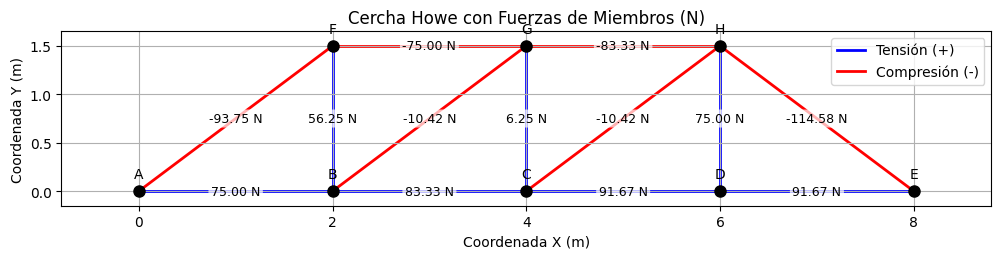

Howe truss visualization with member forces generated successfully.


In [50]:
import matplotlib.pyplot as plt

# 4. Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(12, 8))

# 5. Draw the nodes of the truss as points
for node_name, (x_coord, y_coord) in nodes_numerical.items():
    ax.plot(x_coord, y_coord, 'o', color='black', markersize=8)
    ax.text(x_coord, y_coord + 0.1, node_name, ha='center', va='bottom')

# Legend handles for tension and compression
tension_patch = plt.Line2D([0], [0], color='blue', lw=2, label='Tensión (+)')
compression_patch = plt.Line2D([0], [0], color='red', lw=2, label='Compresión (-)')

# 6. Draw each member of the truss as a line, applying a different color for tension and compression
# 7. Annotate each member with the value of its calculated force
for m1_name, m2_name in members:
    member_key = f'F_{m1_name}_{m2_name}'
    force_value = member_forces_numerical.get(member_key)

    if force_value is None:
        # Try reverse order if not found (e.g., F_B_A vs F_A_B)
        member_key = f'F_{m2_name}_{m1_name}'
        force_value = member_forces_numerical.get(member_key)

    if force_value is not None:
        x1, y1 = nodes_numerical[m1_name]
        x2, y2 = nodes_numerical[m2_name]

        # Determine color based on force (positive for tension, negative for compression)
        color = 'blue' if force_value >= 0 else 'red'

        # Plot the member
        ax.plot([x1, x2], [y1, y2], color=color, linewidth=2, zorder=1)

        # Annotate force value at the center of the member
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2
        ax.text(mid_x, mid_y, f'{force_value:.2f} N', color='black', fontsize=9, ha='center', va='center',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.2'))

# 8. Add axis labels
ax.set_xlabel('Coordenada X (m)')
ax.set_ylabel('Coordenada Y (m)')

# 9. Add a title to the graph
ax.set_title('Cercha Howe con Fuerzas de Miembros (N)')

# 10. Include a legend
ax.legend(handles=[tension_patch, compression_patch], loc='best')

# 11. Adjust axis limits and aspect ratio
ax.set_aspect('equal', adjustable='box')
ax.autoscale_view()

# Make sure the plot shows all nodes and annotations well
ax.margins(0.1)

# 12. Show the plot
plt.grid(True)
plt.show()

print("Howe truss visualization with member forces generated successfully.")

## Final Task

### Subtask:
Resumir el análisis realizado para la viga doblemente apoyada y la cercha Howe, destacando los resultados clave de cada estructura.


## Summary:

### Data Analysis Key Findings

*   **Simply Supported Beam Analysis:**
    *   Symbolic variables (`L`, `x`, `a`, `P1`, `w0`) were successfully defined, and load functions for point load and distributed load were created using SymPy's `Heaviside` function.
    *   Shear force and bending moment expressions were derived through integration, with explicit handling of `Heaviside` functions to ensure accuracy in boundary condition evaluation.
    *   The system of four equilibrium equations (moment at `x=0` and `x=L` is zero, shear force at `x=0` equals `R_A`, and shear force at `x=L` equals `-R_B`) was successfully solved, yielding symbolic expressions for reactions (`R_A`, `R_B`) and integration constants (`C1`, `C2`).
    *   Numerical values were substituted for symbolic variables (e.g., L = 10 m, P1 = 100 N, w0 = 50 N/m, a = 3 m), and the shear force and bending moment diagrams were plotted, clearly showing their variation along the beam.
*   **Howe Truss Analysis:**
    *   Symbolic variables (`L_panel`, `H`, `F1`, `F2`) were defined to represent truss geometry and applied loads.
    *   The truss structure was configured by defining 8 nodes using `sympy.Point` and 13 members. Applied loads (`F1` at node 'B', `F2` at node 'D') were also defined.
    *   Symbolic variables for 3 reaction forces (`R_Ax`, `R_Ay`, `R_Ey`) and 13 internal member forces were established.
    *   A system of 16 equilibrium equations (2 for each of the 8 nodes) was successfully formulated and solved using SymPy, determining all reaction and internal member forces.
    *   The truss was visualized, with member forces annotated and color-coded (blue for tension, red for compression) based on numerical values ($L_{panel} = 2.0$ m, $H = 1.5$ m, $F1 = 50.0$ N, $F2 = 75.0$ N).

### Insights or Next Steps

*   SymPy proves to be a powerful tool for symbolic structural analysis, allowing for the derivation of generalized equations for shear forces, bending moments, and member forces that can be applied to various loading and geometric conditions.
*   Next steps could involve performing optimization studies to find the most efficient truss or beam designs under specific load cases, or extending the analysis to dynamic loads or more complex structural elements like frames.
